# ✨ Clustering of Salaried Employees using k-Means 🎰

## Table of Contents

1. **[Importing Libraires](#1)**
   
2. **[Loading Dataset](#2)**

3. **[Data Information](#3)**

4. **[Data Cleaning](#4)**

5. **[Data Transformation](#5)**

6. **[Data Reduction](#6)**

7. **[Finding Optimal k](#7)**

8. **[k-Means Algorithm](#8)**

9. **[Final Clustering](#9)**

Now, let's proceed with each section one by one, starting with importing libraries.

<a id="1"></a> <br>

## Section 1: Importing Required Libraries and Modules

In [ ]:
# Purpose: Import necessary libraries for the project.

In [ ]:
# Install the 'missingno' library for visualizing missing data
%pip install missingno -q

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data preprocessing and clustering
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.cluster import KMeans

# Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Dimensionality reduction
from sklearn.decomposition import PCA

<a id="2"></a> <br>

## Section 2: Loading Dataset into Pandas' DataFrame

In [ ]:
# Purpose: Load the dataset that will be used for analysis and clustering.

In [ ]:
# Load the dataset
df = pd.read_csv("../input/hyderabad-salaried-employees-dataset-clustering/hyderabad-salaried-employees.csv")

# Display the first few rows of the dataset for an initial overview
df.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,HYDERABAD-SALARIED


<a id="3"></a> <br>

## Section 3: Data Information

In [ ]:
# Purpose: Provide an overview of the dataset, including the number of rows, columns, and data types.

In [ ]:
# Display information about the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   candidateName       28843 non-null  object
 1   companyName         28806 non-null  object
 2   designation         24217 non-null  object
 3   experienceMas       28847 non-null  object
 4   locationCurrentMas  28847 non-null  object
 5   qualificationMas    23971 non-null  object
 6   qualificationMas2   15449 non-null  object
 7   salary              28847 non-null  object
 8   Category            28847 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [ ]:
# Purpose: Provide summary statistics for the dataset, including measures like mean, min, max, and quartiles.

In [ ]:
# Generate summary statistics for the dataset
df.describe()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
count,28843,28806,24217,28847,28847,23971,15449,28847,28847
unique,27288,15153,12636,492,3,51,48,1560,1
top,- -,Currently Unemployed,Currently Unemployed,10 Year(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 6.0 lacs,HYDERABAD-SALARIED
freq,27,804,778,966,28841,8922,5448,1695,28847


<a id="4"></a> <br>

## Section 4: Data Cleaning

In [ ]:
# Purpose: Prepare the dataset for analysis by addressing data quality issues, including missing values, formatting, and encoding.

In [ ]:
# Check for missing values in each column
missing_values = df.isna().sum()

candidateName             4
companyName              41
designation            4630
experienceMas             0
locationCurrentMas        0
qualificationMas       4876
qualificationMas2     13398
salary                    0
Category                  0
dtype: int64

#### Checking Unique Values in each Column

In [ ]:
# Check the number of unique values in each column
unique_values = df.nunique()

candidateName         27288
companyName           15153
designation           12636
experienceMas           492
locationCurrentMas        3
qualificationMas         51
qualificationMas2        48
salary                 1560
Category                  1
dtype: int64

#### Checking Values in 'locationCurrentMas'

In [ ]:
# Check the value counts in the 'locationCurrentMas' column to understand the distribution
location_counts = df['locationCurrentMas'].value_counts()
location_counts

Hyderabad/ Secunderabad    28841
Hyderabad                      3
Hyderabad                      3
Name: locationCurrentMas, dtype: int64

#### Visualizing Missing Pattern in Dataset

<AxesSubplot:>

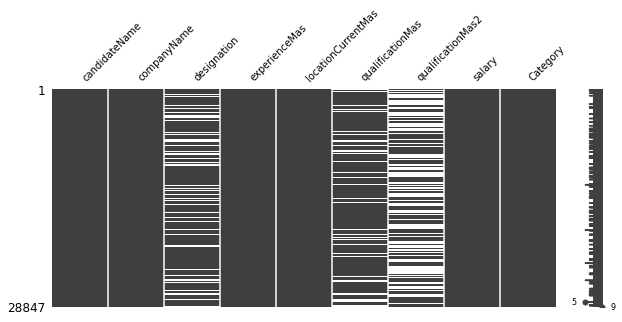

In [ ]:
# Visualize the missing value pattern in the dataset
msno.matrix(df, figsize=(10, 4), fontsize=10)

#### Droping Rows from Some Columns containing NaN Values

In [ ]:
# Drop rows containing NaN values in specific columns
columns_to_check_for_nan = ['companyName', 'designation', 'candidateName', 'Category', 'locationCurrentMas']
df.dropna(axis=0, inplace=True, subset=columns_to_check_for_nan)

# Create a copy of the cleaned dataset for final processing
final = df.copy(deep=True)

<AxesSubplot:>

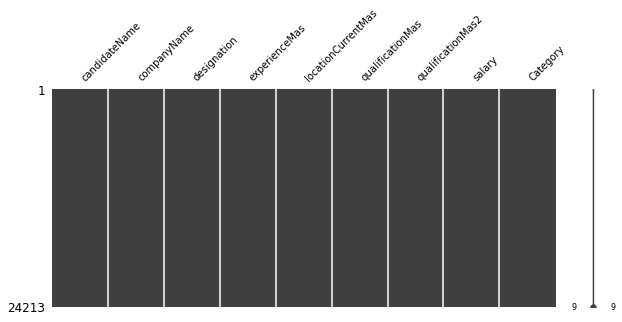

In [ ]:
# Replace "NaN" values in 'qualificationMas' and 'qualificationMas2' with "Missing" (str)
df['qualificationMas'].fillna(value='Missing', inplace=True)
df['qualificationMas2'].fillna(value='Missing', inplace=True)

# Visualize the updated missing value pattern
msno.matrix(df, figsize=(10, 4), fontsize=10)

#### Droping Irrelevant Columns

In [ ]:
# Drop irrelevant columns
columns_to_drop = ['candidateName', 'Category', 'locationCurrentMas']
df.drop(columns=columns_to_drop, inplace=True)

#### Formatting Columns Data in Usable Form

In [ ]:
# Format columns for usability
# Convert 'Rs. X Lakhs' [Object] in 'X'[float]
df['salary'] = df['salary'].astype('str')
df['salary'] = df['salary'].apply(lambda x: x.replace('Rs. ', '').replace(' lacs', '')).astype(np.float64)

# Convert 'A Year(s) B Month(s)' [object] into Month(s) [float]
def process_exp(dataframe, colid):
    # Process experience format
    dataframe['experienceMas'] = dataframe['experienceMas'].astype('str')
    dataframe['experienceMas'].replace('Fresher', '0 Year(s) 0 Month(s)', inplace=True)

    for rowid in range(dataframe.shape[0]):
        element = dataframe.iloc[rowid, colid].split(' ')
        if len(element) == 4:
            year, month = element[0], element[2]
        else:
            year, month = element[0], 0
        dataframe.iloc[rowid, colid] = (12 * float(year)) + float(month)

    dataframe.iloc[:, 2] = pd.to_numeric(dataframe.experienceMas)
    return dataframe

df = process_exp(dataframe=df, colid=2)

# Label encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the cleaned and formatted dataset
df.head()

,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
0,777,9365,25.0,15,43,6.71
1,265,7708,69.0,38,4,5.00
2,12683,10809,52.0,2,43,84.00
4,1928,1430,80.0,2,33,8.05
5,7180,10090,242.0,45,48,16.00


<a id="5"></a> <br>

## 5. Data Transformation

## Normalize Data to fit into Clustering Algorithmv

In [ ]:
data = pd.DataFrame(normalize(df,axis=0), columns=df.columns)
data.head()

,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
0,0.000695,0.008324,0.001108,0.004041,0.007620,0.001818
1,0.000237,0.006851,0.003058,0.010237,0.000709,0.001355
2,0.011345,0.009607,0.002305,0.000539,0.007620,0.022758
3,0.001725,0.001271,0.003546,0.000539,0.005848,0.002181
4,0.006422,0.008968,0.010726,0.012123,0.008506,0.004335


<a id="6"></a> <br>

## Section 6: Data Reduction

In [ ]:
# Purpose: Reduce the dimensionality of the dataset to make it suitable for visualization and clustering.

#### Checking Correlation Between Columns

<AxesSubplot:>

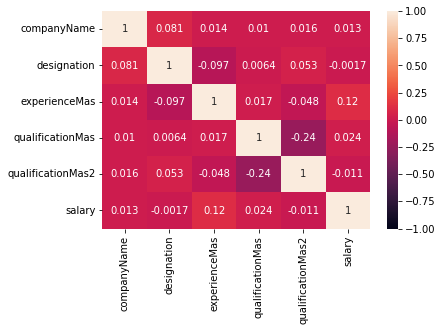

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap")

#### Principal Component Analysis

>Visualizing clustered scatter plot of such a high-dimensional data isn't feasible.

> To get two of all columns for such a plot, I utilized the Principal Component Analysis.


In [ ]:
# Define the PCA transformation with 2 components
pca = PCA(n_components=2)

# Fit the PCA transformation on the dataset
pca.fit(data)

# Apply the transformation to the dataset to obtain two principal components
data = pca.transform(data)

<a id="7"></a> <br>

## Section 7: Find Optimal Value of K

#### Elbow Method

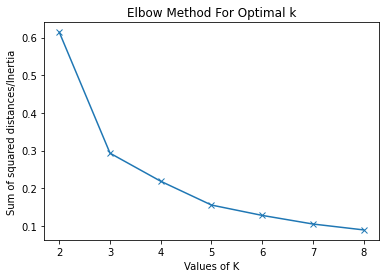

In [ ]:
# Purpose: Determine the optimal number of clusters (K) for the K-Means algorithm using the Elbow Method.

# Calculate the sum of squared distances (inertia) for different values of K
Sum_of_squared_distances = []
K = range(2, 9)

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal K
plt.figure(figsize=(8, 4))
plt.plot(K, Sum_of_squared_distances, 'x-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.show()

### Statistical Metrics for achieving optimal 'k'

> Silhouette score, Calinski Harabasz (CH) Score and Davies Bouldin (DB) score are plotted for clustering at varying 'k'.

> The value of 'k' which maximises the first two while minimizes the DB score metric is considered to be the optimal choice.

#### Silhouette analysis

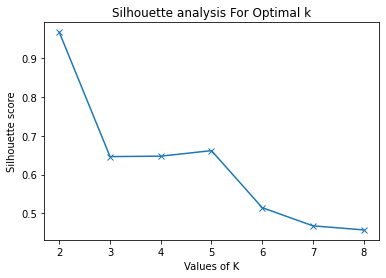

In [ ]:
# Define a range of values for K
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Initialize lists to store the scores
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Initialize K-Means with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    # Silhouette score
    silhouette_avg.append(silhouette_score(data, cluster_labels))

# Plot Silhouette analysis
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_avg, 'x-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.show()

#### Calinski Harabasz Score

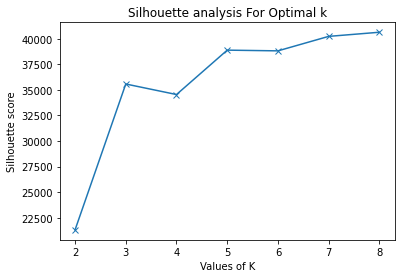

In [ ]:
# Define a range of values for K
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Initialize lists to store the scores
calinski_harabasz_scores = []

for num_clusters in range_n_clusters:
    # Initialize K-Means with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    
    # Calinski-Harabasz (CH) score
    calinski_harabasz_scores.append(calinski_harabasz_score(data, cluster_labels))

# Plot CH score analysis
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, calinski_harabasz_scores, 'x-')
plt.xlabel('Values of K')
plt.ylabel('Calinski-Harabasz (CH) Score')
plt.title('Calinski-Harabasz Score Analysis For Optimal K')
plt.show()


#### Davies Bouldin Score

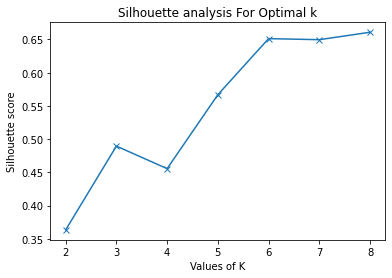

In [ ]:
# Define a range of values for K
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Initialize lists to store the scores
davies_bouldin_scores = []

for num_clusters in range_n_clusters:
    # Initialize K-Means with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    
    # Davies-Bouldin (DB) score
    davies_bouldin_scores.append(davies_bouldin_score(data, cluster_labels))

# Plot DB score analysis
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, davies_bouldin_scores, 'x-')
plt.xlabel('Values of K')
plt.ylabel('Davies-Bouldin (DB) Score')
plt.title('Davies-Bouldin Score Analysis For Optimal K')
plt.show()

<a id="8"></a> <br>

## Section 8: K-Means Clustering Algorithm

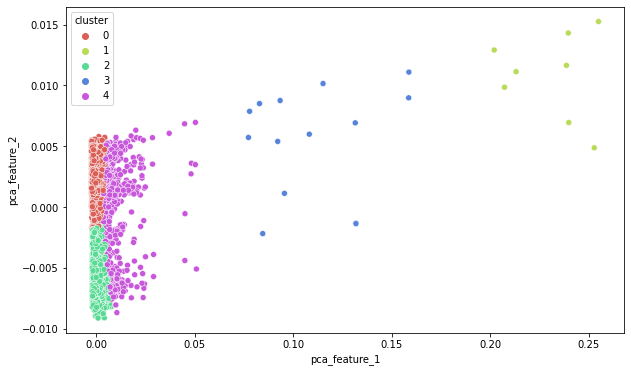

In [ ]:
# Purpose: Apply the K-Means clustering algorithm with the optimal number of clusters to the dataset and visualize the results.

# Number of clusters based on the optimal K value determined earlier
clusters = 5  # Replace with the optimal value from the analysis

# Initialize K-Means with the chosen number of clusters and k-means++ initialization
kmeans = KMeans(n_clusters=clusters, init='k-means++')
kmeans.fit(data)
pred = kmeans.predict(data)

# Create a DataFrame with PCA features and cluster labels
data = pd.DataFrame(data, columns=['pca_feature_1', 'pca_feature_2'])
data['cluster'] = pred

# Plot showing clusters using PCA-selected features
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pca_feature_1', y='pca_feature_2', hue='cluster', palette=sns.color_palette("hls", clusters), legend="full")
plt.title('Clustered Scatter Plot')
plt.show()

<a id="9"></a> <br>
## Section 9: Final Data [Clusters Assigned]

In [ ]:
# Purpose: Add cluster assignments to the original dataset and sort it by cluster labels.

# Add cluster assignments to the original dataset
final['cluster'] = pred

# Sort the dataset by cluster labels for analysis and inspection
final = final.sort_values(by='cluster', ignore_index=True)

# Display the first few rows of the dataset with cluster assignments
final.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category,cluster
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED,0
1,Hara Das,leonia hollistic destination hyderabad,banquet manager,11 Year(s),Hyderabad/ Secunderabad,BHM (Hotel Management),NaN,Rs. 7.2 lacs,HYDERABAD-SALARIED,0
2,Yamini Patil,Mascotspin Control,Technical Manager,6 Year(s) 9 Month(s),Hyderabad/ Secunderabad,B.Sc. (Science),M.Sc. (Science),Rs. 7.0 lacs,HYDERABAD-SALARIED,0
3,Vajra Mouli,Kotak Mahindra Bank,Branch Manager,15 Year(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MBA/ PGDM,Rs. 16.0 lacs,HYDERABAD-SALARIED,0
4,Chandra Mohan Muttamsetty,Star Health And Allied Insurance Co Ltd,MANAGER HOSPITAL RELATIONS AND NETWORK PROVIDER,5 Year(s) 4 Month(s),Hyderabad/ Secunderabad,BDS (Dental Surgery),NaN,Rs. 6.0 lacs,HYDERABAD-SALARIED,0
